In [44]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [45]:
def bar(axes, query_loc, x, y, sort_by=None):
    """
    Can remove sort_by and make it so that it sorts by var y.
    """
    conn = sqlite3.connect('apex.db')
    stmt = open(query_loc)

    df = pd.read_sql_query(stmt.read(), conn)
    
    if sort_by:
        df = df.sort_values(by=sort_by, ascending=True)

    stmt.close()
    conn.close()

    for x_values, y_values in enumerate(df[y]):
        axes.text(y_values, x_values - 0.4, y_values, color='orange')

    return axes.barh(df[x], df[y])

### Count of All Weapons Used

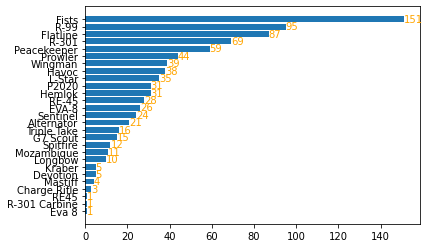

In [46]:
fig, ax = plt.subplots()
bar(ax, 'scripts/most-weapons-used.txt', 'weapon', 'count', sort_by='count')
plt.show()

### Weapons Carried in Top 5 Placement

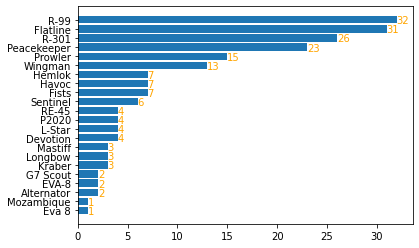

In [47]:
fig, ax = plt.subplots()
bar(ax, 'scripts/top-weapons.txt', 'weapon', 'count', sort_by='count')
plt.show()

### Top 10 Weapons Based on Damage and Kills
#### Does not explicitly mean a weapon earned that damage or kill.
#### Only means that a kill was confirmed, or an amount of damage was dealt w/ weapon in inventory.

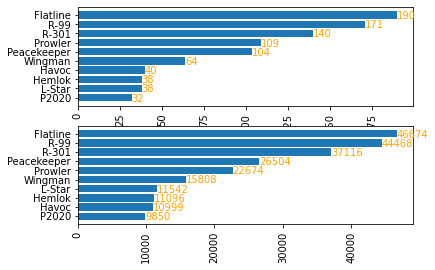

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
bar(ax1, 'scripts/weapon-kills.txt', 'weapon', 'kills', sort_by='kills')
bar(ax2, 'scripts/weapon-kills.txt', 'weapon', 'damage', sort_by='damage')
plt.show()